In [1]:
import pandas as pd
import numpy as np
from epftoolbox.evaluation import MAE,MAPE,sMAPE,RMSE,rMAE

In [ ]:
# 07-20: df1[15023:15191]
# 10-19: df1[17207:17375]
# 01-18: df1[19391:19559]
# 04-19: df1[21575:21743]

## month

In [297]:
# forecast data
df = pd.read_csv('forecast results/ensemble_DNN/auc_Apr_ensemble.csv')
forecast = df.set_index('datetime')
forecast.index = pd.to_datetime(forecast.index)

# real data
df1 = pd.read_csv('final datasets/auctionData_final.csv')
df2 = df1[21575:21743].reset_index(drop=True)
real = df2.loc[:, ['auctionPrice']]
real_2d = pd.DataFrame(real.values.reshape(-1, 24),
                       index=forecast.index,
                       columns=forecast.columns)

In [298]:
MAE(p_pred = forecast.values, p_real = real_2d.values)

6.046379455838884

In [299]:
RMSE(p_pred = forecast.values, p_real = real_2d.values)

8.154571661382763

In [300]:
# %
MAPE(p_pred = forecast.values, p_real = real_2d.values)*100

8.789139738047243

In [301]:
# %
sMAPE(p_pred = forecast.values, p_real = real_2d.values)*100

8.85035537672197

In [302]:
rMAE(p_pred = forecast.values, p_real = real_2d.values, m='D')

1.255575227688801

## DM test

In [137]:
from epftoolbox.evaluation import DM, plot_multivariate_DM_test

In [213]:
forecasts = pd.read_csv('forecast results/imb_all.csv',index_col=0)
real_price = forecasts.loc[:, ['imbalancePrice']]
forecasts.index = pd.to_datetime(forecasts.index)
del forecasts['imbalancePrice']

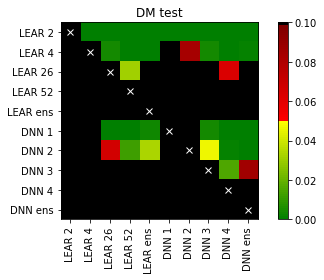

In [216]:
plot_multivariate_DM_test(real_price=real_price, forecasts=forecasts)

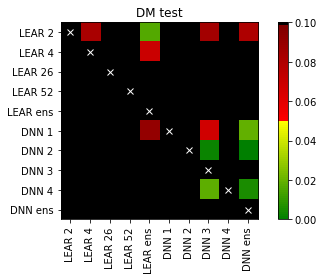

In [217]:
forecasts = pd.read_csv('forecast results/auc_all.csv',index_col=0)
real_price = forecasts.loc[:, ['auctionPrice']]
forecasts.index = pd.to_datetime(forecasts.index)
del forecasts['auctionPrice']

plot_multivariate_DM_test(real_price=real_price, forecasts=forecasts)

## imbalance price

In [176]:
# real
df = pd.read_csv('final datasets/imbalanceData_final.csv')
real = pd.concat([df[15023:15191],df[17207:17375],df[19391:19559],df[21575:21743]]).reset_index(drop=True)
real_price_imb = real.loc[:, ['datetime','imbalancePrice']]
real_price_imb.set_index('datetime',inplace=True)

# forecast
df1 = pd.read_csv('forecast results/2 weeks/imb_July/LEAR_forecast_datimbalanceData_final_YT2_CW14.csv')
df2 = pd.read_csv('forecast results/2 weeks/imb_October/LEAR_forecast_datimbalanceData_final_YT2_CW14.csv')
df3 = pd.read_csv('forecast results/2 weeks/imb_January/LEAR_forecast_datimbalanceData_final_YT2_CW21.csv')
df4 = pd.read_csv('forecast results/2 weeks/imb_April/LEAR_forecast_datimbalanceData_final_YT2_CW19.csv')

df1.drop(columns='datetime',inplace=True)
df2.drop(columns='datetime',inplace=True)
df3.drop(columns='datetime',inplace=True)
df4.drop(columns='datetime',inplace=True)

fc_2w = np.concatenate([df1.values.reshape(-1,1),df2.values.reshape(-1,1),df3.values.reshape(-1,1),df4.values.reshape(-1,1)])
real_price_imb['LEAR 2'] = fc_2w

In [177]:
df1 = pd.read_csv('forecast results/4 weeks/imb_July/LEAR_forecast_datimbalanceData_final_YT2_CW28.csv')
df2 = pd.read_csv('forecast results/4 weeks/imb_October/LEAR_forecast_datimbalanceData_final_YT2_CW28.csv')
df3 = pd.read_csv('forecast results/4 weeks/imb_January/LEAR_forecast_datimbalanceData_final_YT2_CW28.csv')
df4 = pd.read_csv('forecast results/4 weeks/imb_April/LEAR_forecast_datimbalanceData_final_YT2_CW28.csv')

df1.drop(columns='datetime',inplace=True)
df2.drop(columns='datetime',inplace=True)
df3.drop(columns='datetime',inplace=True)
df4.drop(columns='datetime',inplace=True)

fc_4w = np.concatenate([df1.values.reshape(-1,1),df2.values.reshape(-1,1),df3.values.reshape(-1,1),df4.values.reshape(-1,1)])
real_price_imb['LEAR 4'] = fc_4w

In [178]:
df1 = pd.read_csv('forecast results/0.5 year/imb_July/LEAR_forecast_datimbalanceData_final_YT2_CW182.csv')
df2 = pd.read_csv('forecast results/0.5 year/imb_October/LEAR_forecast_datimbalanceData_final_YT2_CW182.csv')
df3 = pd.read_csv('forecast results/0.5 year/imb_January/LEAR_forecast_datimbalanceData_final_YT2_CW182.csv')
df4 = pd.read_csv('forecast results/0.5 year/imb_April/LEAR_forecast_datimbalanceData_final_YT2_CW182.csv')

df1.drop(columns='datetime',inplace=True)
df2.drop(columns='datetime',inplace=True)
df3.drop(columns='datetime',inplace=True)
df4.drop(columns='datetime',inplace=True)

fc_hy = np.concatenate([df1.values.reshape(-1,1),df2.values.reshape(-1,1),df3.values.reshape(-1,1),df4.values.reshape(-1,1)])
real_price_imb['LEAR 26'] = fc_hy

In [179]:
df1 = pd.read_csv('forecast results/1 year/imb_July/LEAR_forecast_datimbalanceData_final_YT2_CW364.csv')
df2 = pd.read_csv('forecast results/1 year/imb_October/LEAR_forecast_datimbalanceData_final_YT2_CW364.csv')
df3 = pd.read_csv('forecast results/1 year/imb_January/LEAR_forecast_datimbalanceData_final_YT2_CW364.csv')
df4 = pd.read_csv('forecast results/1 year/imb_April/LEAR_forecast_datimbalanceData_final_YT2_CW364.csv')

df1.drop(columns='datetime',inplace=True)
df2.drop(columns='datetime',inplace=True)
df3.drop(columns='datetime',inplace=True)
df4.drop(columns='datetime',inplace=True)

fc_1y = np.concatenate([df1.values.reshape(-1,1),df2.values.reshape(-1,1),df3.values.reshape(-1,1),df4.values.reshape(-1,1)])
real_price_imb['LEAR 52'] = fc_1y

In [181]:
df1 = pd.read_csv('forecast results/ensemble_LEAR/imb_Jul_ensemble.csv')
df2 = pd.read_csv('forecast results/ensemble_LEAR/imb_Oct_ensemble.csv')
df3 = pd.read_csv('forecast results/ensemble_LEAR/imb_Jan_ensemble.csv')
df4 = pd.read_csv('forecast results/ensemble_LEAR/imb_Apr_ensemble.csv')

df1.drop(columns='datetime',inplace=True)
df2.drop(columns='datetime',inplace=True)
df3.drop(columns='datetime',inplace=True)
df4.drop(columns='datetime',inplace=True)

fc_1e = np.concatenate([df1.values.reshape(-1,1),df2.values.reshape(-1,1),df3.values.reshape(-1,1),df4.values.reshape(-1,1)])
real_price_imb['LEAR ens'] = fc_1e

In [183]:
df1 = pd.read_csv('forecast results/DNN/imb_July/DNN_forecast_nl2_datimbalanceData_final_YT2_SFH1_CW1_1.csv')
df2 = pd.read_csv('forecast results/DNN/imb_October/DNN_forecast_nl2_datimbalanceData_final_YT2_SFH1_CW1_1.csv')
df3 = pd.read_csv('forecast results/DNN/imb_January/DNN_forecast_nl2_datimbalanceData_final_YT2_SFH1_CW1_1.csv')
df4 = pd.read_csv('forecast results/DNN/imb_April/DNN_forecast_nl2_datimbalanceData_final_YT2_SFH1_CW1_1.csv')

df1.drop(columns='datetime',inplace=True)
df2.drop(columns='datetime',inplace=True)
df3.drop(columns='datetime',inplace=True)
df4.drop(columns='datetime',inplace=True)

fc_1 = np.concatenate([df1.values.reshape(-1,1),df2.values.reshape(-1,1),df3.values.reshape(-1,1),df4.values.reshape(-1,1)])
real_price_imb['DNN 1'] = fc_1

In [184]:
df1 = pd.read_csv('forecast results/DNN/imb_July/DNN_forecast_nl2_datimbalanceData_final_YT2_SFH1_CW1_2.csv')
df2 = pd.read_csv('forecast results/DNN/imb_October/DNN_forecast_nl2_datimbalanceData_final_YT2_SFH1_CW1_2.csv')
df3 = pd.read_csv('forecast results/DNN/imb_January/DNN_forecast_nl2_datimbalanceData_final_YT2_SFH1_CW1_2.csv')
df4 = pd.read_csv('forecast results/DNN/imb_April/DNN_forecast_nl2_datimbalanceData_final_YT2_SFH1_CW1_2.csv')

df1.drop(columns='datetime',inplace=True)
df2.drop(columns='datetime',inplace=True)
df3.drop(columns='datetime',inplace=True)
df4.drop(columns='datetime',inplace=True)

fc_2 = np.concatenate([df1.values.reshape(-1,1),df2.values.reshape(-1,1),df3.values.reshape(-1,1),df4.values.reshape(-1,1)])
real_price_imb['DNN 2'] = fc_2

In [185]:
df1 = pd.read_csv('forecast results/DNN/imb_July/DNN_forecast_nl2_datimbalanceData_final_YT2_SFH1_CW1_3.csv')
df2 = pd.read_csv('forecast results/DNN/imb_October/DNN_forecast_nl2_datimbalanceData_final_YT2_SFH1_CW1_3.csv')
df3 = pd.read_csv('forecast results/DNN/imb_January/DNN_forecast_nl2_datimbalanceData_final_YT2_SFH1_CW1_3.csv')
df4 = pd.read_csv('forecast results/DNN/imb_April/DNN_forecast_nl2_datimbalanceData_final_YT2_SFH1_CW1_3.csv')

df1.drop(columns='datetime',inplace=True)
df2.drop(columns='datetime',inplace=True)
df3.drop(columns='datetime',inplace=True)
df4.drop(columns='datetime',inplace=True)

fc_3 = np.concatenate([df1.values.reshape(-1,1),df2.values.reshape(-1,1),df3.values.reshape(-1,1),df4.values.reshape(-1,1)])
real_price_imb['DNN 3'] = fc_3

In [186]:
df1 = pd.read_csv('forecast results/DNN/imb_July/DNN_forecast_nl2_datimbalanceData_final_YT2_SFH1_CW1_4.csv')
df2 = pd.read_csv('forecast results/DNN/imb_October/DNN_forecast_nl2_datimbalanceData_final_YT2_SFH1_CW1_4.csv')
df3 = pd.read_csv('forecast results/DNN/imb_January/DNN_forecast_nl2_datimbalanceData_final_YT2_SFH1_CW1_4.csv')
df4 = pd.read_csv('forecast results/DNN/imb_April/DNN_forecast_nl2_datimbalanceData_final_YT2_SFH1_CW1_4.csv')

df1.drop(columns='datetime',inplace=True)
df2.drop(columns='datetime',inplace=True)
df3.drop(columns='datetime',inplace=True)
df4.drop(columns='datetime',inplace=True)

fc_4 = np.concatenate([df1.values.reshape(-1,1),df2.values.reshape(-1,1),df3.values.reshape(-1,1),df4.values.reshape(-1,1)])
real_price_imb['DNN 4'] = fc_4

In [187]:
df1 = pd.read_csv('forecast results/ensemble_DNN/imb_Jul_ensemble.csv')
df2 = pd.read_csv('forecast results/ensemble_DNN/imb_Oct_ensemble.csv')
df3 = pd.read_csv('forecast results/ensemble_DNN/imb_Jan_ensemble.csv')
df4 = pd.read_csv('forecast results/ensemble_DNN/imb_Apr_ensemble.csv')

df1.drop(columns='datetime',inplace=True)
df2.drop(columns='datetime',inplace=True)
df3.drop(columns='datetime',inplace=True)
df4.drop(columns='datetime',inplace=True)

fc_de = np.concatenate([df1.values.reshape(-1,1),df2.values.reshape(-1,1),df3.values.reshape(-1,1),df4.values.reshape(-1,1)])
real_price_imb['DNN ens'] = fc_de

In [189]:
real_price_imb.to_csv('forecast results/imb_all.csv')

## auction price

In [191]:
# real
df = pd.read_csv('final datasets/auctionData_final.csv')
real = pd.concat([df[15023:15191],df[17207:17375],df[19391:19559],df[21575:21743]]).reset_index(drop=True)
real_price_auc = real.loc[:, ['datetime','auctionPrice']]
real_price_auc.set_index('datetime',inplace=True)

# forecast
df1 = pd.read_csv('forecast results/2 weeks/auc_July/LEAR_forecast_datauctionData_final_YT2_CW14.csv')
df2 = pd.read_csv('forecast results/2 weeks/auc_October/LEAR_forecast_datauctionData_final_YT2_CW14.csv')
df3 = pd.read_csv('forecast results/2 weeks/auc_January/LEAR_forecast_datauctionData_final_YT2_CW14.csv')
df4 = pd.read_csv('forecast results/2 weeks/auc_April/LEAR_forecast_datauctionData_final_YT2_CW14.csv')

df1.drop(columns='datetime',inplace=True)
df2.drop(columns='datetime',inplace=True)
df3.drop(columns='datetime',inplace=True)
df4.drop(columns='datetime',inplace=True)

fc_2w = np.concatenate([df1.values.reshape(-1,1),df2.values.reshape(-1,1),df3.values.reshape(-1,1),df4.values.reshape(-1,1)])
real_price_auc['LEAR 2'] = fc_2w

In [193]:
df1 = pd.read_csv('forecast results/4 weeks/auc_July/LEAR_forecast_datauctionData_final_YT2_CW28.csv')
df2 = pd.read_csv('forecast results/4 weeks/auc_October/LEAR_forecast_datauctionData_final_YT2_CW28.csv')
df3 = pd.read_csv('forecast results/4 weeks/auc_January/LEAR_forecast_datauctionData_final_YT2_CW28.csv')
df4 = pd.read_csv('forecast results/4 weeks/auc_April/LEAR_forecast_datauctionData_final_YT2_CW28.csv')

df1.drop(columns='datetime',inplace=True)
df2.drop(columns='datetime',inplace=True)
df3.drop(columns='datetime',inplace=True)
df4.drop(columns='datetime',inplace=True)

fc_4w = np.concatenate([df1.values.reshape(-1,1),df2.values.reshape(-1,1),df3.values.reshape(-1,1),df4.values.reshape(-1,1)])
real_price_auc['LEAR 4'] = fc_4w

In [195]:
df1 = pd.read_csv('forecast results/0.5 year/auc_July/LEAR_forecast_datauctionData_final_YT2_CW182.csv')
df2 = pd.read_csv('forecast results/0.5 year/auc_October/LEAR_forecast_datauctionData_final_YT2_CW182.csv')
df3 = pd.read_csv('forecast results/0.5 year/auc_January/LEAR_forecast_datauctionData_final_YT2_CW182.csv')
df4 = pd.read_csv('forecast results/0.5 year/auc_April/LEAR_forecast_datauctionData_final_YT2_CW182.csv')

df1.drop(columns='datetime',inplace=True)
df2.drop(columns='datetime',inplace=True)
df3.drop(columns='datetime',inplace=True)
df4.drop(columns='datetime',inplace=True)

fc_hy = np.concatenate([df1.values.reshape(-1,1),df2.values.reshape(-1,1),df3.values.reshape(-1,1),df4.values.reshape(-1,1)])
real_price_auc['LEAR 26'] = fc_hy

In [196]:
df1 = pd.read_csv('forecast results/1 year/auc_July/LEAR_forecast_datauctionData_final_YT2_CW364.csv')
df2 = pd.read_csv('forecast results/1 year/auc_October/LEAR_forecast_datauctionData_final_YT2_CW364.csv')
df3 = pd.read_csv('forecast results/1 year/auc_January/LEAR_forecast_datauctionData_final_YT2_CW364.csv')
df4 = pd.read_csv('forecast results/1 year/auc_April/LEAR_forecast_datauctionData_final_YT2_CW364.csv')

df1.drop(columns='datetime',inplace=True)
df2.drop(columns='datetime',inplace=True)
df3.drop(columns='datetime',inplace=True)
df4.drop(columns='datetime',inplace=True)

fc_1y = np.concatenate([df1.values.reshape(-1,1),df2.values.reshape(-1,1),df3.values.reshape(-1,1),df4.values.reshape(-1,1)])
real_price_auc['LEAR 52'] = fc_1y

In [197]:
df1 = pd.read_csv('forecast results/ensemble_LEAR/auc_Jul_ensemble.csv')
df2 = pd.read_csv('forecast results/ensemble_LEAR/auc_Oct_ensemble.csv')
df3 = pd.read_csv('forecast results/ensemble_LEAR/auc_Jan_ensemble.csv')
df4 = pd.read_csv('forecast results/ensemble_LEAR/auc_Apr_ensemble.csv')

df1.drop(columns='datetime',inplace=True)
df2.drop(columns='datetime',inplace=True)
df3.drop(columns='datetime',inplace=True)
df4.drop(columns='datetime',inplace=True)

fc_1e = np.concatenate([df1.values.reshape(-1,1),df2.values.reshape(-1,1),df3.values.reshape(-1,1),df4.values.reshape(-1,1)])
real_price_auc['LEAR ens'] = fc_1e

In [199]:
df1 = pd.read_csv('forecast results/DNN/auc_July/DNN_forecast_nl2_datauctionData_final_YT2_SFH1_CW1_1.csv')
df2 = pd.read_csv('forecast results/DNN/auc_October/DNN_forecast_nl2_datauctionData_final_YT2_SFH1_CW1_1.csv')
df3 = pd.read_csv('forecast results/DNN/auc_January/DNN_forecast_nl2_datauctionData_final_YT2_SFH1_CW1_1.csv')
df4 = pd.read_csv('forecast results/DNN/auc_April/DNN_forecast_nl2_datauctionData_final_YT2_SFH1_CW1_1.csv')

df1.drop(columns='datetime',inplace=True)
df2.drop(columns='datetime',inplace=True)
df3.drop(columns='datetime',inplace=True)
df4.drop(columns='datetime',inplace=True)

fc_1 = np.concatenate([df1.values.reshape(-1,1),df2.values.reshape(-1,1),df3.values.reshape(-1,1),df4.values.reshape(-1,1)])
real_price_auc['DNN 1'] = fc_1

In [200]:
df1 = pd.read_csv('forecast results/DNN/auc_July/DNN_forecast_nl2_datauctionData_final_YT2_SFH1_CW1_2.csv')
df2 = pd.read_csv('forecast results/DNN/auc_October/DNN_forecast_nl2_datauctionData_final_YT2_SFH1_CW1_2.csv')
df3 = pd.read_csv('forecast results/DNN/auc_January/DNN_forecast_nl2_datauctionData_final_YT2_SFH1_CW1_2.csv')
df4 = pd.read_csv('forecast results/DNN/auc_April/DNN_forecast_nl2_datauctionData_final_YT2_SFH1_CW1_2.csv')

df1.drop(columns='datetime',inplace=True)
df2.drop(columns='datetime',inplace=True)
df3.drop(columns='datetime',inplace=True)
df4.drop(columns='datetime',inplace=True)

fc_2 = np.concatenate([df1.values.reshape(-1,1),df2.values.reshape(-1,1),df3.values.reshape(-1,1),df4.values.reshape(-1,1)])
real_price_auc['DNN 2'] = fc_2

In [201]:
df1 = pd.read_csv('forecast results/DNN/auc_July/DNN_forecast_nl2_datauctionData_final_YT2_SFH1_CW1_3.csv')
df2 = pd.read_csv('forecast results/DNN/auc_October/DNN_forecast_nl2_datauctionData_final_YT2_SFH1_CW1_3.csv')
df3 = pd.read_csv('forecast results/DNN/auc_January/DNN_forecast_nl2_datauctionData_final_YT2_SFH1_CW1_3.csv')
df4 = pd.read_csv('forecast results/DNN/auc_April/DNN_forecast_nl2_datauctionData_final_YT2_SFH1_CW1_3.csv')

df1.drop(columns='datetime',inplace=True)
df2.drop(columns='datetime',inplace=True)
df3.drop(columns='datetime',inplace=True)
df4.drop(columns='datetime',inplace=True)

fc_3 = np.concatenate([df1.values.reshape(-1,1),df2.values.reshape(-1,1),df3.values.reshape(-1,1),df4.values.reshape(-1,1)])
real_price_auc['DNN 3'] = fc_3

In [202]:
df1 = pd.read_csv('forecast results/DNN/auc_July/DNN_forecast_nl2_datauctionData_final_YT2_SFH1_CW1_4.csv')
df2 = pd.read_csv('forecast results/DNN/auc_October/DNN_forecast_nl2_datauctionData_final_YT2_SFH1_CW1_4.csv')
df3 = pd.read_csv('forecast results/DNN/auc_January/DNN_forecast_nl2_datauctionData_final_YT2_SFH1_CW1_4.csv')
df4 = pd.read_csv('forecast results/DNN/auc_April/DNN_forecast_nl2_datauctionData_final_YT2_SFH1_CW1_4.csv')

df1.drop(columns='datetime',inplace=True)
df2.drop(columns='datetime',inplace=True)
df3.drop(columns='datetime',inplace=True)
df4.drop(columns='datetime',inplace=True)

fc_4 = np.concatenate([df1.values.reshape(-1,1),df2.values.reshape(-1,1),df3.values.reshape(-1,1),df4.values.reshape(-1,1)])
real_price_auc['DNN 4'] = fc_4

In [203]:
df1 = pd.read_csv('forecast results/ensemble_DNN/auc_Jul_ensemble.csv')
df2 = pd.read_csv('forecast results/ensemble_DNN/auc_Oct_ensemble.csv')
df3 = pd.read_csv('forecast results/ensemble_DNN/auc_Jan_ensemble.csv')
df4 = pd.read_csv('forecast results/ensemble_DNN/auc_Apr_ensemble.csv')

df1.drop(columns='datetime',inplace=True)
df2.drop(columns='datetime',inplace=True)
df3.drop(columns='datetime',inplace=True)
df4.drop(columns='datetime',inplace=True)

fc_de = np.concatenate([df1.values.reshape(-1,1),df2.values.reshape(-1,1),df3.values.reshape(-1,1),df4.values.reshape(-1,1)])
real_price_auc['DNN ens'] = fc_de

In [205]:
real_price_auc.to_csv('forecast results/auc_all.csv')

## overall

In [131]:
# forecast
df1 = pd.read_csv('forecast results/ensemble_DNN/imb_Jul_ensemble.csv')
df2 = pd.read_csv('forecast results/ensemble_DNN/imb_Oct_ensemble.csv')
df3 = pd.read_csv('forecast results/ensemble_DNN/imb_Jan_ensemble.csv')
df4 = pd.read_csv('forecast results/ensemble_DNN/imb_Apr_ensemble.csv')
fc_all = pd.concat([df1,df2,df3,df4]).reset_index(drop=True)

forecast = fc_all.set_index('datetime')
forecast.index = pd.to_datetime(forecast.index)

# real
df = pd.read_csv('final datasets/imbalanceData_final.csv')
real_all = pd.concat([df[15023:15191],df[17207:17375],df[19391:19559],df[21575:21743]]).reset_index(drop=True)
real = real_all.loc[:, ['imbalancePrice']]
real_2d = pd.DataFrame(real.values.reshape(-1, 24),
                       index=forecast.index,
                       columns=forecast.columns)

In [132]:
MAE(p_pred = forecast.values, p_real = real_2d.values)

14.89183642926404

In [133]:
RMSE(p_pred = forecast.values, p_real = real_2d.values)

22.28767098878761

In [134]:
# %
MAPE(p_pred = forecast.values, p_real = real_2d.values)*100

inf

In [135]:
# %
sMAPE(p_pred = forecast.values, p_real = real_2d.values)*100

34.59385897300501

In [136]:
rMAE(p_pred = forecast.values, p_real = real_2d.values, m='D')

0.5960406476436161

## Ensemble_LEAR

In [277]:
df1 = pd.read_csv('forecast results/2 weeks/imb_July/LEAR_forecast_datimbalanceData_final_YT2_CW14.csv')
df2 = pd.read_csv('forecast results/4 weeks/imb_July/LEAR_forecast_datimbalanceData_final_YT2_CW28.csv')
df3 = pd.read_csv('forecast results/0.5 year/imb_July/LEAR_forecast_datimbalanceData_final_YT2_CW182.csv')
df4 = pd.read_csv('forecast results/1 year/imb_July/LEAR_forecast_datimbalanceData_final_YT2_CW364.csv')

In [278]:
df_concat = pd.concat([df1, df2, df3, df4])
df_mean = df_concat.groupby(level=0).mean()
df = df_mean.set_index(df1['datetime'], drop=True)
df.to_csv('forecast results/ensemble/imb_Jul_ensemble.csv')

In [279]:
df1 = pd.read_csv('forecast results/2 weeks/imb_October/LEAR_forecast_datimbalanceData_final_YT2_CW14.csv')
df2 = pd.read_csv('forecast results/4 weeks/imb_October/LEAR_forecast_datimbalanceData_final_YT2_CW28.csv')
df3 = pd.read_csv('forecast results/0.5 year/imb_October/LEAR_forecast_datimbalanceData_final_YT2_CW182.csv')
df4 = pd.read_csv('forecast results/1 year/imb_October/LEAR_forecast_datimbalanceData_final_YT2_CW364.csv')

In [280]:
df_concat = pd.concat([df1, df2, df3, df4])
df_mean = df_concat.groupby(level=0).mean()
df = df_mean.set_index(df1['datetime'], drop=True)
df.to_csv('forecast results/ensemble/imb_Oct_ensemble.csv')

In [281]:
df1 = pd.read_csv('forecast results/2 weeks/imb_January/LEAR_forecast_datimbalanceData_final_YT2_CW21.csv')
df2 = pd.read_csv('forecast results/4 weeks/imb_January/LEAR_forecast_datimbalanceData_final_YT2_CW28.csv')
df3 = pd.read_csv('forecast results/0.5 year/imb_January/LEAR_forecast_datimbalanceData_final_YT2_CW182.csv')
df4 = pd.read_csv('forecast results/1 year/imb_January/LEAR_forecast_datimbalanceData_final_YT2_CW364.csv')

In [282]:
df_concat = pd.concat([df1, df2, df3, df4])
df_mean = df_concat.groupby(level=0).mean()
df = df_mean.set_index(df1['datetime'], drop=True)
df.to_csv('forecast results/ensemble/imb_Jan_ensemble.csv')

In [283]:
df1 = pd.read_csv('forecast results/2 weeks/imb_April/LEAR_forecast_datimbalanceData_final_YT2_CW19.csv')
df2 = pd.read_csv('forecast results/4 weeks/imb_April/LEAR_forecast_datimbalanceData_final_YT2_CW28.csv')
df3 = pd.read_csv('forecast results/0.5 year/imb_April/LEAR_forecast_datimbalanceData_final_YT2_CW182.csv')
df4 = pd.read_csv('forecast results/1 year/imb_April/LEAR_forecast_datimbalanceData_final_YT2_CW364.csv')

In [284]:
df_concat = pd.concat([df1, df2, df3, df4])
df_mean = df_concat.groupby(level=0).mean()
df = df_mean.set_index(df1['datetime'], drop=True)
df.to_csv('forecast results/ensemble/imb_Apr_ensemble.csv')

In [285]:
df1 = pd.read_csv('forecast results/2 weeks/auc_July/LEAR_forecast_datauctionData_final_YT2_CW14.csv')
df2 = pd.read_csv('forecast results/4 weeks/auc_July/LEAR_forecast_datauctionData_final_YT2_CW28.csv')
df3 = pd.read_csv('forecast results/0.5 year/auc_July/LEAR_forecast_datauctionData_final_YT2_CW182.csv')
df4 = pd.read_csv('forecast results/1 year/auc_July/LEAR_forecast_datauctionData_final_YT2_CW364.csv')

In [286]:
df_concat = pd.concat([df1, df2, df3, df4])
df_mean = df_concat.groupby(level=0).mean()
df = df_mean.set_index(df1['datetime'], drop=True)
df.to_csv('forecast results/ensemble/auc_Jul_ensemble.csv')

In [287]:
df1 = pd.read_csv('forecast results/2 weeks/auc_October/LEAR_forecast_datauctionData_final_YT2_CW14.csv')
df2 = pd.read_csv('forecast results/4 weeks/auc_October/LEAR_forecast_datauctionData_final_YT2_CW28.csv')
df3 = pd.read_csv('forecast results/0.5 year/auc_October/LEAR_forecast_datauctionData_final_YT2_CW182.csv')
df4 = pd.read_csv('forecast results/1 year/auc_October/LEAR_forecast_datauctionData_final_YT2_CW364.csv')

In [288]:
df_concat = pd.concat([df1, df2, df3, df4])
df_mean = df_concat.groupby(level=0).mean()
df = df_mean.set_index(df1['datetime'], drop=True)
df.to_csv('forecast results/ensemble/auc_Oct_ensemble.csv')

In [290]:
df1 = pd.read_csv('forecast results/2 weeks/auc_January/LEAR_forecast_datauctionData_final_YT2_CW14.csv')
df2 = pd.read_csv('forecast results/4 weeks/auc_January/LEAR_forecast_datauctionData_final_YT2_CW28.csv')
df3 = pd.read_csv('forecast results/0.5 year/auc_January/LEAR_forecast_datauctionData_final_YT2_CW182.csv')
df4 = pd.read_csv('forecast results/1 year/auc_January/LEAR_forecast_datauctionData_final_YT2_CW364.csv')

In [291]:
df_concat = pd.concat([df1, df2, df3, df4])
df_mean = df_concat.groupby(level=0).mean()
df = df_mean.set_index(df1['datetime'], drop=True)
df.to_csv('forecast results/ensemble/auc_Jan_ensemble.csv')

In [292]:
df1 = pd.read_csv('forecast results/2 weeks/auc_April/LEAR_forecast_datauctionData_final_YT2_CW14.csv')
df2 = pd.read_csv('forecast results/4 weeks/auc_April/LEAR_forecast_datauctionData_final_YT2_CW28.csv')
df3 = pd.read_csv('forecast results/0.5 year/auc_April/LEAR_forecast_datauctionData_final_YT2_CW182.csv')
df4 = pd.read_csv('forecast results/1 year/auc_April/LEAR_forecast_datauctionData_final_YT2_CW364.csv')

In [293]:
df_concat = pd.concat([df1, df2, df3, df4])
df_mean = df_concat.groupby(level=0).mean()
df = df_mean.set_index(df1['datetime'], drop=True)
df.to_csv('forecast results/ensemble/auc_Apr_ensemble.csv')

## Ensemble_DNN

In [296]:
df1 = pd.read_csv('forecast results/DNN/imb_July/DNN_forecast_nl2_datimbalanceData_final_YT2_SFH1_CW1_1.csv')
df2 = pd.read_csv('forecast results/DNN/imb_July/DNN_forecast_nl2_datimbalanceData_final_YT2_SFH1_CW1_2.csv')
df3 = pd.read_csv('forecast results/DNN/imb_July/DNN_forecast_nl2_datimbalanceData_final_YT2_SFH1_CW1_3.csv')
df4 = pd.read_csv('forecast results/DNN/imb_July/DNN_forecast_nl2_datimbalanceData_final_YT2_SFH1_CW1_4.csv')

df_concat = pd.concat([df1, df2, df3, df4])
df_mean = df_concat.groupby(level=0).mean()
df = df_mean.set_index(df1['datetime'], drop=True)
df.to_csv('forecast results/ensemble_DNN/imb_Jul_ensemble.csv')

In [297]:
df1 = pd.read_csv('forecast results/DNN/imb_October/DNN_forecast_nl2_datimbalanceData_final_YT2_SFH1_CW1_1.csv')
df2 = pd.read_csv('forecast results/DNN/imb_October/DNN_forecast_nl2_datimbalanceData_final_YT2_SFH1_CW1_2.csv')
df3 = pd.read_csv('forecast results/DNN/imb_October/DNN_forecast_nl2_datimbalanceData_final_YT2_SFH1_CW1_3.csv')
df4 = pd.read_csv('forecast results/DNN/imb_October/DNN_forecast_nl2_datimbalanceData_final_YT2_SFH1_CW1_4.csv')

df_concat = pd.concat([df1, df2, df3, df4])
df_mean = df_concat.groupby(level=0).mean()
df = df_mean.set_index(df1['datetime'], drop=True)
df.to_csv('forecast results/ensemble_DNN/imb_Oct_ensemble.csv')

In [298]:
df1 = pd.read_csv('forecast results/DNN/imb_January/DNN_forecast_nl2_datimbalanceData_final_YT2_SFH1_CW1_1.csv')
df2 = pd.read_csv('forecast results/DNN/imb_January/DNN_forecast_nl2_datimbalanceData_final_YT2_SFH1_CW1_2.csv')
df3 = pd.read_csv('forecast results/DNN/imb_January/DNN_forecast_nl2_datimbalanceData_final_YT2_SFH1_CW1_3.csv')
df4 = pd.read_csv('forecast results/DNN/imb_January/DNN_forecast_nl2_datimbalanceData_final_YT2_SFH1_CW1_4.csv')

df_concat = pd.concat([df1, df2, df3, df4])
df_mean = df_concat.groupby(level=0).mean()
df = df_mean.set_index(df1['datetime'], drop=True)
df.to_csv('forecast results/ensemble_DNN/imb_Jan_ensemble.csv')

In [299]:
df1 = pd.read_csv('forecast results/DNN/imb_April/DNN_forecast_nl2_datimbalanceData_final_YT2_SFH1_CW1_1.csv')
df2 = pd.read_csv('forecast results/DNN/imb_April/DNN_forecast_nl2_datimbalanceData_final_YT2_SFH1_CW1_2.csv')
df3 = pd.read_csv('forecast results/DNN/imb_April/DNN_forecast_nl2_datimbalanceData_final_YT2_SFH1_CW1_3.csv')
df4 = pd.read_csv('forecast results/DNN/imb_April/DNN_forecast_nl2_datimbalanceData_final_YT2_SFH1_CW1_4.csv')

df_concat = pd.concat([df1, df2, df3, df4])
df_mean = df_concat.groupby(level=0).mean()
df = df_mean.set_index(df1['datetime'], drop=True)
df.to_csv('forecast results/ensemble_DNN/imb_Apr_ensemble.csv')

In [300]:
df1 = pd.read_csv('forecast results/DNN/auc_July/DNN_forecast_nl2_datauctionData_final_YT2_SFH1_CW1_1.csv')
df2 = pd.read_csv('forecast results/DNN/auc_July/DNN_forecast_nl2_datauctionData_final_YT2_SFH1_CW1_2.csv')
df3 = pd.read_csv('forecast results/DNN/auc_July/DNN_forecast_nl2_datauctionData_final_YT2_SFH1_CW1_3.csv')
df4 = pd.read_csv('forecast results/DNN/auc_July/DNN_forecast_nl2_datauctionData_final_YT2_SFH1_CW1_4.csv')

df_concat = pd.concat([df1, df2, df3, df4])
df_mean = df_concat.groupby(level=0).mean()
df = df_mean.set_index(df1['datetime'], drop=True)
df.to_csv('forecast results/ensemble_DNN/auc_Jul_ensemble.csv')

In [301]:
df1 = pd.read_csv('forecast results/DNN/auc_October/DNN_forecast_nl2_datauctionData_final_YT2_SFH1_CW1_1.csv')
df2 = pd.read_csv('forecast results/DNN/auc_October/DNN_forecast_nl2_datauctionData_final_YT2_SFH1_CW1_2.csv')
df3 = pd.read_csv('forecast results/DNN/auc_October/DNN_forecast_nl2_datauctionData_final_YT2_SFH1_CW1_3.csv')
df4 = pd.read_csv('forecast results/DNN/auc_October/DNN_forecast_nl2_datauctionData_final_YT2_SFH1_CW1_4.csv')

df_concat = pd.concat([df1, df2, df3, df4])
df_mean = df_concat.groupby(level=0).mean()
df = df_mean.set_index(df1['datetime'], drop=True)
df.to_csv('forecast results/ensemble_DNN/auc_Oct_ensemble.csv')

In [302]:
df1 = pd.read_csv('forecast results/DNN/auc_January/DNN_forecast_nl2_datauctionData_final_YT2_SFH1_CW1_1.csv')
df2 = pd.read_csv('forecast results/DNN/auc_January/DNN_forecast_nl2_datauctionData_final_YT2_SFH1_CW1_2.csv')
df3 = pd.read_csv('forecast results/DNN/auc_January/DNN_forecast_nl2_datauctionData_final_YT2_SFH1_CW1_3.csv')
df4 = pd.read_csv('forecast results/DNN/auc_January/DNN_forecast_nl2_datauctionData_final_YT2_SFH1_CW1_4.csv')

df_concat = pd.concat([df1, df2, df3, df4])
df_mean = df_concat.groupby(level=0).mean()
df = df_mean.set_index(df1['datetime'], drop=True)
df.to_csv('forecast results/ensemble_DNN/auc_Jan_ensemble.csv')

In [303]:
df1 = pd.read_csv('forecast results/DNN/auc_April/DNN_forecast_nl2_datauctionData_final_YT2_SFH1_CW1_1.csv')
df2 = pd.read_csv('forecast results/DNN/auc_April/DNN_forecast_nl2_datauctionData_final_YT2_SFH1_CW1_2.csv')
df3 = pd.read_csv('forecast results/DNN/auc_April/DNN_forecast_nl2_datauctionData_final_YT2_SFH1_CW1_3.csv')
df4 = pd.read_csv('forecast results/DNN/auc_April/DNN_forecast_nl2_datauctionData_final_YT2_SFH1_CW1_4.csv')

df_concat = pd.concat([df1, df2, df3, df4])
df_mean = df_concat.groupby(level=0).mean()
df = df_mean.set_index(df1['datetime'], drop=True)
df.to_csv('forecast results/ensemble_DNN/auc_Apr_ensemble.csv')